# Neural Networks - Forest_Fire problem 
## ----------------------------------------------------------------------------------------------------------------------------

## Problem Statement : PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

## 1. Import necessary libraries :

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [2]:
forest_fire_data = pd.read_csv('forestfires.csv',sep=',')
forest_fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## 3. Data Understanding :

### 3.1 About the data :

* **month** - month of the year: 'jan' to 'dec'
* **day**- day of the week: 'mon' to 'sun'
* **FFMC**-FFMC index from the FWI system: 18.7 to 96.20
* **DMC**-DMC index from the FWI system: 1.1 to 291.3
* **DC**-DC index from the FWI system: 7.9 to 860.6
* **ISI**-ISI index from the FWI system: 0.0 to 56.10
* **temp**-temperature in Celsius degrees: 2.2 to 33.30
* **RH**-relative humidity in %: 15.0 to 100
* **wind**-wind speed in km/h: 0.40 to 9.40

* **rain**-outside rain in mm/m2 : 0.0 to 6.4
* **Size_Categorie**-the burned area of the forest ( Small , Large)

### 3.2 Initial Analysis :

In [3]:
forest_fire_data.shape

(517, 31)

In [4]:
forest_fire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forest_fire_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

### 3.3 Columns Renaming :

In [6]:
forest_fire_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
forest_fire_data.columns = ['month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
                           'rain', 'area', 'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
                           'day_tue', 'day_wed', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
                           'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
                           'month_oct', 'month_sep', 'size_category']
forest_fire_data.head()

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## 4. Data Preparation :

In [8]:
forest_fire_data_copy = forest_fire_data.copy()

### 4.1 Dropping Columns :

In [9]:
forest_fire_data_copy.drop(labels=['day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
                           'day_tue', 'day_wed', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
                           'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
                           'month_oct', 'month_sep',],axis=1,inplace = True)

In [10]:
forest_fire_data_copy

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [11]:
forest_fire_data_copy.head()

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


## 5. Data Pre-Processing :

###  5.1 Data Transformation :

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
forest_fire_data_copy['month'] = le.fit_transform(forest_fire_data['month'])
forest_fire_data_copy['day'] = le.fit_transform(forest_fire_data['day'])
forest_fire_data_copy['size_category'] = le.fit_transform(forest_fire_data['size_category'])
#forest_fire_data_copy['burned_area'] = le.fit_transform(forest_fire_data_copy['burned_area'])
forest_fire_data_copy.head()

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [13]:
forest_fire_data_copy.isna().sum()

month            0
day              0
ffmc             0
dmc              0
dc               0
isi              0
temp             0
rh               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [14]:
forest_fire_data_copy.dtypes

month              int32
day                int32
ffmc             float64
dmc              float64
dc               float64
isi              float64
temp             float64
rh                 int64
wind             float64
rain             float64
area             float64
size_category      int32
dtype: object

## 6. Model Building :

### 6.1 Building the input and output

In [15]:
X = forest_fire_data_copy.drop(labels='size_category',axis=1)
y = forest_fire_data_copy[['size_category']]

###  6.2 Normalising the values :

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
min_max_scaler = MinMaxScaler()
scaled_x = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = scaled_x,columns=X.columns)
X_scaled

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


## 7. Model Training :

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size= 0.25,random_state=123,stratify=y)

In [20]:
X_train.shape,y_train.shape

((387, 11), (387, 1))

In [21]:
X_test.shape,y_test.shape

((130, 11), (130, 1))

## --------------------------------------------------------------------------------------------------------------------------------------

# Neural Network Concept :

## 8. Model Building and Training :

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
model_1 = Sequential()
model_1.add(Dense(units = 100,activation='relu',input_dim = 11))
model_1.add(Dense(units = 70,activation='elu'))
model_1.add(Dense(units = 1,activation='relu'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 1)                 71        
                                                                 
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


## 9. Model Compilation :

In [24]:
model_1.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae','accuracy'])

## 10. Training the model :

In [25]:
model_1.fit(x=X_train,y=y_train,batch_size=50,epochs=20)

Epoch 1/20
8/8 [==============================] - 4s 4ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 8/20
8/8 [==============================] - 0s 4ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 9/20
8/8 [==============================] - 0s 4ms/step - loss: 0.7313 - mae: 0.7313 - accuracy: 0.2687
Epoch 10/2

## 11. Finding the best neural network model : 

### I. Data Set :

In [39]:
forest_fire_data_2 = forest_fire_data_copy.copy()
forest_fire_data_2.head()

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


### II. Data Pre-Processing :

In [40]:
#Setting Target Features and Predicting Features
TargetVariable=['size_category']
Predictors=['month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind','rain', 'area']

#Setting Target Variable and Predicting Variable
X_1= forest_fire_data_2[Predictors].values
y_1= forest_fire_data_2[TargetVariable].values

In [41]:
# Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

#Fitting of the values
PredictorScalerFit=PredictorScaler.fit(X_1)
TargetVarScalerFit=TargetVarScaler.fit(y_1)
 
# Generating the standardized values of X and y
X_transformed=PredictorScalerFit.transform(X_1)
y_transformed=TargetVarScalerFit.transform(y_1)

### III. Model Training :

In [42]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.25, random_state=12,stratify=y) 

In [43]:
(X_train.shape,X_test.shape)

((387, 11), (130, 11))

In [44]:
(y_train.shape,y_test.shape)

((387, 1), (130, 1))

### IV. Best Model Building and Training :

In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [46]:
def BestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[25, 50, 75, 100,125]
    epoch_list  =   [20, 30, 50, 100,150]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model_1 = Sequential()
            # Defining the first layer of the model
            model_1.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model_1.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model_1.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model_1.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model_1.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model_1.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 

 #Calling the function
ResultsData = BestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 25 - epochs: 20 Accuracy: 54.70030392351403
2 Parameters: batch_size: 25 - epochs: 30 Accuracy: 72.3904968083861
3 Parameters: batch_size: 25 - epochs: 50 Accuracy: 80.2757992286901
4 Parameters: batch_size: 25 - epochs: 100 Accuracy: 79.5971640702179
5 Parameters: batch_size: 25 - epochs: 150 Accuracy: 68.43521546478568
6 Parameters: batch_size: 50 - epochs: 20 Accuracy: 52.64360386582433
7 Parameters: batch_size: 50 - epochs: 30 Accuracy: 69.37842068761779
8 Parameters: batch_size: 50 - epochs: 50 Accuracy: 80.24692522338302
9 Parameters: batch_size: 50 - epochs: 100 Accuracy: 75.90735456657723
10 Parameters: batch_size: 50 - epochs: 150 Accuracy: 76.83756809824419
11 Parameters: batch_size: 75 - epochs: 20 Accuracy: 51.86961441341292
12 Parameters: batch_size: 75 - epochs: 30 Accuracy: 61.590336295598846
13 Parameters: batch_size: 75 - epochs: 50 Accuracy: 58.92281232329543
14 Parameters: batch_size: 75 - epochs: 100 Accuracy: 78.56321767045836
15 Parameter

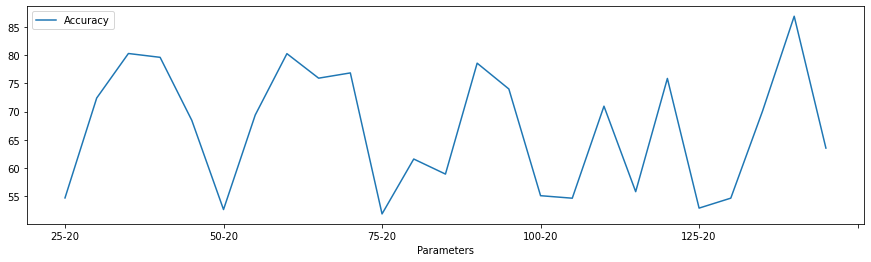

In [47]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')
plt.show()

## 12. Prediction:

In [48]:
# Fitting the ANN to the Training set
model_1.fit(X_train, y_train ,batch_size = 75, epochs = 150, verbose=0)
 
# Generating Predictions on testing data
Predictions = model_1.predict((X_test))

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Original_Burned_Area'] = y_test_orig
TestingData['Predicted_Burned_Area']=Predictions
TestingData.head(20)

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,Original_Burned_Area,Predicted_Burned_Area
0,5.0,6.0,91.9,133.6,520.5,8.0,14.2,58.0,4.0,0.0,0.00,1.0,1.001901
1,6.0,3.0,90.4,89.5,290.8,6.4,14.3,46.0,1.8,0.0,0.90,1.0,0.986052
2,0.0,6.0,88.0,17.2,43.5,3.8,15.2,51.0,2.7,0.0,0.00,1.0,1.019660
3,1.0,3.0,91.4,142.4,601.4,10.6,20.1,39.0,5.4,0.0,2.74,1.0,0.937649
4,11.0,3.0,89.7,90.0,704.4,4.8,17.8,67.0,2.2,0.0,2.01,1.0,0.918755
5,1.0,5.0,94.8,108.3,647.1,17.0,18.6,51.0,4.5,0.0,0.00,1.0,0.993074
6,5.0,5.0,93.1,180.4,430.8,11.0,26.9,28.0,5.4,0.0,86.45,0.0,0.731141
7,7.0,2.0,91.7,35.8,80.8,7.8,15.2,27.0,4.9,0.0,0.00,1.0,0.990026
8,11.0,6.0,94.3,85.1,692.3,15.9,25.9,24.0,4.0,0.0,0.00,1.0,1.008222
9,7.0,4.0,90.9,18.9,30.6,8.0,8.7,51.0,5.8,0.0,0.00,1.0,1.005214


In [49]:
model_1.evaluate(X_test,y_test,verbose=1)[0]

5/5 [==============================] - 0s 3ms/step - loss: 0.5357 - mae: 0.5357 - accuracy: 0.0000e+00


0.5357092618942261

In [50]:
# Fitting the ANN to the Training set
model_1.fit(X_train, y_train ,batch_size = 75, epochs = 150, verbose=0)
 
# Generating Predictions on testing data
Predictions = model_1.predict((X_train))

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_train_orig=TargetVarScalerFit.inverse_transform(y_train)

# Scaling the test data back to original scale
Train_Data=PredictorScalerFit.inverse_transform(X_train)
 
TrainingData=pd.DataFrame(data=Train_Data, columns=Predictors)
TrainingData['Original_Burned_Area'] = y_train_orig
TrainingData['Predicted_Burned_Area']=Predictions
TrainingData.head(20)

,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,Original_Burned_Area,Predicted_Burned_Area
0,11.0,4.0,92.8,119.0,783.5,7.5,16.8,28.0,4.0,0.0,1.01,1.0,0.984642
1,11.0,0.0,92.5,122.0,789.7,10.2,21.1,39.0,2.2,0.0,8.12,0.0,0.762121
2,11.0,1.0,92.1,87.7,721.1,9.5,18.1,54.0,3.1,0.0,2.13,1.0,0.998420
3,1.0,3.0,90.2,99.6,631.2,6.3,21.4,33.0,3.1,0.0,0.00,1.0,0.996208
4,7.0,1.0,87.2,15.1,36.9,7.1,10.2,45.0,5.8,0.0,3.18,1.0,0.979587
5,1.0,2.0,89.4,253.6,768.4,9.7,14.2,73.0,2.7,0.0,0.00,1.0,1.014995
6,11.0,4.0,92.4,96.2,739.4,8.6,19.2,24.0,4.9,0.0,3.78,1.0,0.961634
7,1.0,3.0,91.4,142.4,601.4,10.6,19.8,39.0,5.4,0.0,0.00,1.0,0.996917
8,11.0,3.0,89.7,90.0,704.4,4.8,17.8,64.0,1.3,0.0,0.00,1.0,0.988989
9,11.0,5.0,91.0,129.5,692.6,7.0,18.8,40.0,2.2,0.0,212.88,0.0,0.731141


In [51]:
model_1.evaluate(X_train,y_train,verbose=1)[0]

13/13 [==============================] - 0s 2ms/step - loss: 0.4647 - mae: 0.4647 - accuracy: 0.0000e+00


0.4646640717983246

In [54]:
# Computing the absolute percent error for test data
APE=100*(abs(TestingData['Original_Burned_Area']-TestingData['Predicted_Burned_Area'])/TestingData['Predicted_Burned_Area'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 68.84414814847958


,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,Original_Burned_Area,Predicted_Burned_Area,APE
0,5.0,6.0,91.9,133.6,520.5,8.0,14.2,58.0,4.0,0.0,0.00,1.0,1.001901,0.189719
1,6.0,3.0,90.4,89.5,290.8,6.4,14.3,46.0,1.8,0.0,0.90,1.0,0.986052,1.414557
2,0.0,6.0,88.0,17.2,43.5,3.8,15.2,51.0,2.7,0.0,0.00,1.0,1.019660,1.928128
3,1.0,3.0,91.4,142.4,601.4,10.6,20.1,39.0,5.4,0.0,2.74,1.0,0.937649,6.649668
4,11.0,3.0,89.7,90.0,704.4,4.8,17.8,67.0,2.2,0.0,2.01,1.0,0.918755,8.842988


In [56]:
# Computing the absolute percent error for training data
APE=100*(abs(TrainingData['Original_Burned_Area']-TestingData['Predicted_Burned_Area'])/TrainingData['Predicted_Burned_Area'])
TrainingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TrainingData.head()

The Accuracy of ANN model is: 63.592473592472054


,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,Original_Burned_Area,Predicted_Burned_Area,APE
0,11.0,4.0,92.8,119.0,783.5,7.5,16.8,28.0,4.0,0.0,1.01,1.0,0.984642,0.193044
1,11.0,0.0,92.5,122.0,789.7,10.2,21.1,39.0,2.2,0.0,8.12,0.0,0.762121,129.382506
2,11.0,1.0,92.1,87.7,721.1,9.5,18.1,54.0,3.1,0.0,2.13,1.0,0.998420,1.969148
3,1.0,3.0,90.2,99.6,631.2,6.3,21.4,33.0,3.1,0.0,0.00,1.0,0.996208,6.258793
4,7.0,1.0,87.2,15.1,36.9,7.1,10.2,45.0,5.8,0.0,3.18,1.0,0.979587,8.293839
